In [1]:
import pandas as pd
import numpy as np

In [2]:
water = pd.read_csv('./new_water.csv')

In [3]:
water.head()

,Unnamed: 0,loccd,wqdt,temper,wtemper,uBod,uCod,uSs,uTn,uTp,uBac,uVal,bBod,bCod,bSs,bTn,bTp,bBac,bVal
0,1,40001,2019-01-01,-5.0,12.8,271.8,113.415,140.0,78.358,7.398,198000.0,2144.0,0.47,6.240,1.0,13.129,0.098,0.0,1789.0
1,2,40001,2019-01-02,-4.9,12.8,269.4,128.862,190.0,72.257,7.875,206000.0,2151.0,0.56,6.341,0.9,14.291,0.105,0.0,1777.0
2,3,40001,2019-01-03,-3.5,12.8,262.2,115.041,145.0,57.943,3.995,107000.0,2255.0,0.41,6.728,1.0,13.920,0.109,0.0,1847.0
3,4,40001,2019-01-04,-1.1,12.8,202.2,167.886,295.0,74.212,8.263,116000.0,2235.0,0.55,6.850,1.5,11.174,0.109,0.0,1898.0
4,5,40001,2019-01-05,-2.8,12.8,216.0,139.837,185.0,71.325,7.858,101000.0,2037.0,0.55,6.809,1.0,10.287,0.106,0.0,1672.0


In [4]:
# 동부하수처리장의 bBod 예측 : 88001
water_88001 = water[water['loccd'] == 88001]

In [5]:
water_88001.head()

,Unnamed: 0,loccd,wqdt,temper,wtemper,uBod,uCod,uSs,uTn,uTp,uBac,uVal,bBod,bCod,bSs,bTn,bTp,bBac,bVal
403,404,88001,2019-01-01,1.0,14.3,100.3,90.2,165.0,39.972,4.047,170000.0,64070.0,8.5,8.6,4.0,13.621,0.113,270.0,61880.0
404,405,88001,2019-01-02,3.8,13.2,101.5,86.4,161.3,41.392,4.180,190000.0,70616.0,8.5,8.8,3.7,13.901,0.194,300.0,67939.0
405,406,88001,2019-01-03,6.3,13.9,79.0,81.0,160.0,40.824,3.915,180000.0,63060.0,8.4,9.3,2.8,13.616,0.183,280.0,60380.0
406,407,88001,2019-01-04,4.7,13,100.9,97.8,156.3,36.790,4.484,210000.0,64990.0,8.5,12.2,3.7,12.901,0.052,300.0,62720.0
407,408,88001,2019-01-05,5.5,13.2,101.7,90.6,165.0,38.778,3.763,180000.0,68620.0,8.6,12.9,5.3,13.897,0.089,280.0,66380.0


In [6]:
# 필요한 열만 가져오기
water_88001 = water_88001.loc[:, ['wqdt', 'bBod']]

In [7]:
water_88001.head()

,wqdt,bBod
403,2019-01-01,8.5
404,2019-01-02,8.5
405,2019-01-03,8.4
406,2019-01-04,8.5
407,2019-01-05,8.6


{'whiskers': [<matplotlib.lines.Line2D at 0x23aa117b520>,
 'caps': [<matplotlib.lines.Line2D at 0x23aa117bbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23aa117b1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x23aa11882e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23aa1188640>],
 'means': []}

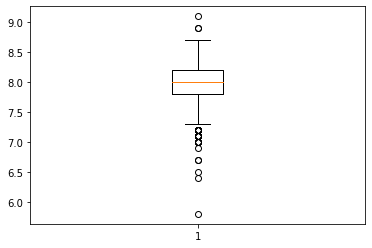

In [8]:
# 이상치 제거
import matplotlib.pyplot as plt
plt.boxplot(water_88001["bBod"])

In [9]:
q1 = np.quantile(water_88001["bBod"], 0.25)
q3 = np.quantile(water_88001["bBod"], 0.75)
iqr = q3 - q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

In [10]:
water_88001_bBod = list(water_88001["bBod"])
water_88001_wqdt = list(water_88001["wqdt"])

for i in range(0, len(water_88001_bBod)):
    if ((water_88001_bBod[i] <= lower_bound)|(water_88001_bBod[i] >= upper_bound)):
        water_88001_bBod[i] = water_88001["bBod"].median()

In [11]:
water_88001 = pd.DataFrame([water_88001_wqdt, water_88001_bBod])
water_88001 = pd.DataFrame(zip(water_88001_wqdt, water_88001_bBod), columns = ['wqdt', 'bBod'])

water_88001

,wqdt,bBod
0,2019-01-01,8.5
1,2019-01-02,8.5
2,2019-01-03,8.4
3,2019-01-04,8.5
4,2019-01-05,8.6
...,...,...
845,2021-06-26,8.0
846,2021-06-27,7.9
847,2021-06-28,8.0
848,2021-06-29,8.0


In [12]:
# pip install --upgrade pip

In [13]:
# !pip install Prophet

In [14]:
# !pip install plotly

In [15]:
prophet_df = water_88001[["wqdt", "bBod"]]
prophet_df.columns = ["ds", "y"]
prophet_df.head()

,ds,y
0,2019-01-01,8.5
1,2019-01-02,8.5
2,2019-01-03,8.4
3,2019-01-04,8.5
4,2019-01-05,8.6


## train, test 구분 x

In [19]:
from prophet import Prophet
prophet = Prophet()
prophet.fit(prophet_df)

14:06:57 - cmdstanpy - INFO - Chain [1] start processing
14:06:57 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
future = prophet.make_future_dataframe(periods = 365)
forecast = prophet.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,8.438548,8.173640,8.718087,8.438548,8.438548,-0.002638,-0.002638,-0.002638,-0.001559,-0.001559,-0.001559,-0.001080,-0.001080,-0.001080,0.0,0.0,0.0,8.435910
1,2019-01-02,8.436854,8.177600,8.708545,8.436854,8.436854,0.006793,0.006793,0.006793,0.001962,0.001962,0.001962,0.004831,0.004831,0.004831,0.0,0.0,0.0,8.443646
2,2019-01-03,8.435160,8.158930,8.715018,8.435160,8.435160,0.002340,0.002340,0.002340,-0.008771,-0.008771,-0.008771,0.011110,0.011110,0.011110,0.0,0.0,0.0,8.437499
3,2019-01-04,8.433466,8.187699,8.735465,8.433466,8.433466,0.031695,0.031695,0.031695,0.014106,0.014106,0.014106,0.017589,0.017589,0.017589,0.0,0.0,0.0,8.465161
4,2019-01-05,8.431772,8.178611,8.725945,8.431772,8.431772,0.015321,0.015321,0.015321,-0.008779,-0.008779,-0.008779,0.024100,0.024100,0.024100,0.0,0.0,0.0,8.447093


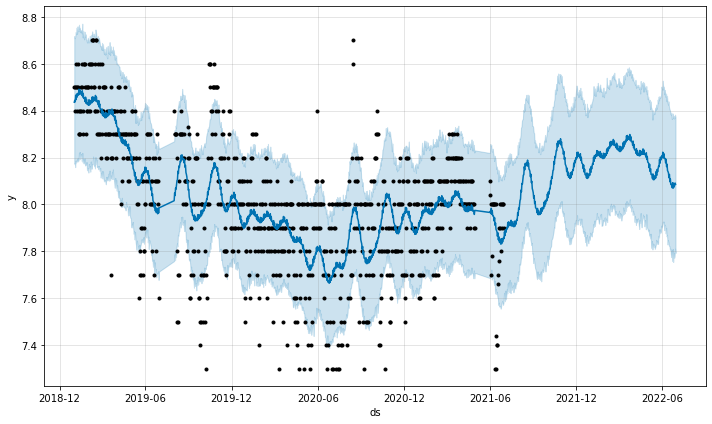

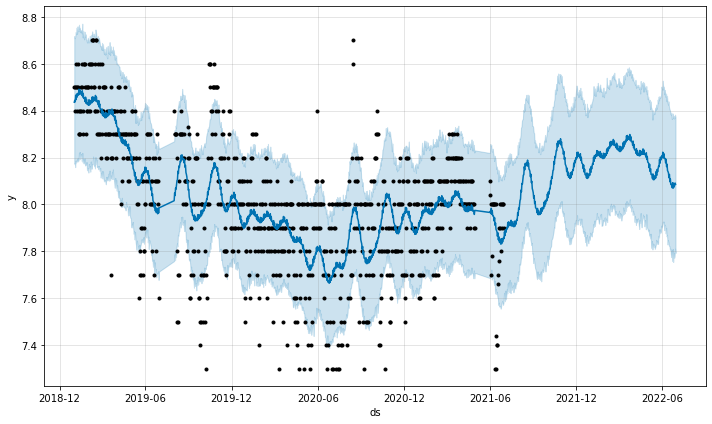

In [21]:
prophet.plot(forecast)

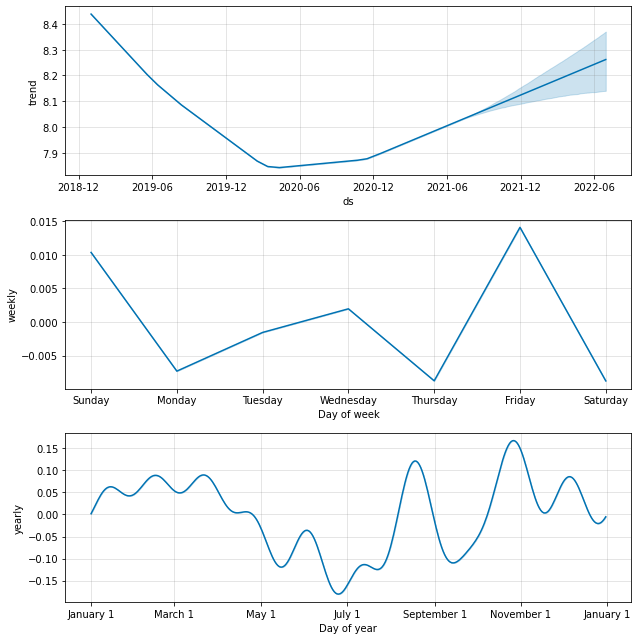

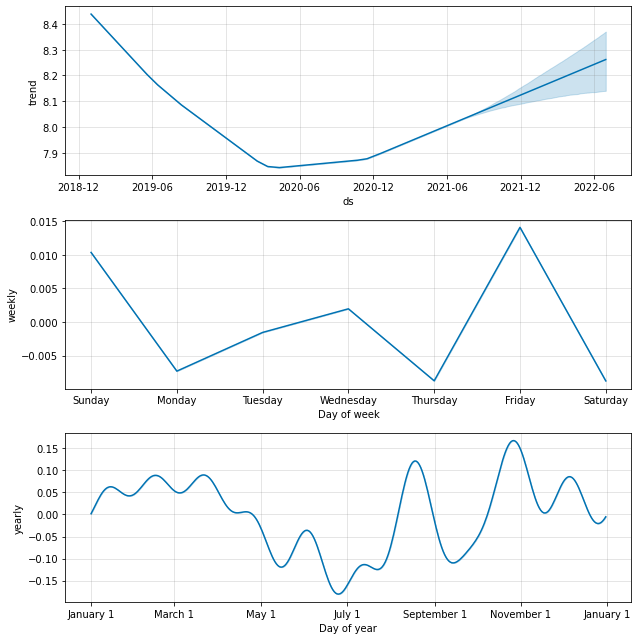

In [22]:
prophet.plot_components(forecast)

In [25]:
from prophet.diagnostics import cross_validation
prophet_cv = cross_validation(prophet, initial = '360 days', period = '90 days', horizon = '180 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


14:25:11 - cmdstanpy - INFO - Chain [1] start processing
14:25:11 - cmdstanpy - INFO - Chain [1] done processing
14:25:15 - cmdstanpy - INFO - Chain [1] start processing
14:25:15 - cmdstanpy - INFO - Chain [1] done processing
14:25:20 - cmdstanpy - INFO - Chain [1] start processing
14:25:20 - cmdstanpy - INFO - Chain [1] done processing
14:25:24 - cmdstanpy - INFO - Chain [1] start processing
14:25:24 - cmdstanpy - INFO - Chain [1] done processing
14:25:29 - cmdstanpy - INFO - Chain [1] start processing
14:25:29 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
prophet_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-01-08,7.902507,7.663899,8.144222,7.6,2020-01-07
1,2020-01-09,7.901327,7.682860,8.145906,7.8,2020-01-07
2,2020-01-10,7.916659,7.669638,8.145774,8.1,2020-01-07
3,2020-01-11,7.916142,7.672533,8.132428,8.0,2020-01-07
4,2020-01-12,7.883702,7.631065,8.112737,8.2,2020-01-07
...,...,...,...,...,...,...
864,2021-06-26,7.601137,7.315534,7.891852,8.0,2021-01-01
865,2021-06-27,7.614875,7.333789,7.893268,7.9,2021-01-01
866,2021-06-28,7.591596,7.296454,7.851337,8.0,2021-01-01
867,2021-06-29,7.590934,7.309377,7.867603,8.0,2021-01-01


In [27]:
from prophet.diagnostics import performance_metrics
prophet_p = performance_metrics(prophet_cv)
prophet_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,18 days,0.108057,0.328720,0.268280,0.034595,0.027586,0.034058,0.576744
1,19 days,0.120962,0.347797,0.269306,0.034892,0.025630,0.034196,0.588372
2,20 days,0.126302,0.355390,0.273928,0.035507,0.025630,0.034755,0.579070
3,21 days,0.131795,0.363036,0.283810,0.036776,0.027799,0.035982,0.558140
4,22 days,0.140213,0.374450,0.295128,0.038252,0.029967,0.037391,0.541860
...,...,...,...,...,...,...,...,...
158,176 days,0.129301,0.359584,0.282699,0.035919,0.030336,0.036604,0.532558
159,177 days,0.145568,0.381534,0.300976,0.038159,0.031710,0.038969,0.500000
160,178 days,0.155537,0.394382,0.309893,0.039242,0.033976,0.040113,0.474419
161,179 days,0.163378,0.404201,0.316003,0.039904,0.033525,0.040883,0.472093


In [35]:
print("MAE : {}".format(round(prophet_p["mae"].mean(), 3)))
print("MAPE : {}".format(round(prophet_p["mape"].mean(), 3)))
print("MSE : {}".format(round(prophet_p["mse"].mean(), 3)))
print("RMSE : {}".format(round(prophet_p["rmse"].mean(), 3)))

MAE : 0.297
MAPE : 0.038
MSE : 0.132
RMSE : 0.36
